# Library and Data import

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
ds = pd.read_csv('homeprices_banglore.csv')

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

X_scaled = sx.fit_transform(ds.drop('price', axis='columns'))
Y_scaled = sy.fit_transform(ds['price'].values.reshape(ds.shape[0],1))

In [54]:
print(X_scaled)
print(Y_scaled)

[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]
[[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]


In [55]:
Y_scaled.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [56]:

Y_scaled.reshape(Y_scaled.shape[0],)
Y_scaled.shape


(20, 1)

# Batch Gradient Descent

In [57]:
def batch_gradient_descent(x, y_true, epochs, learning_rates = .01):
    
    number_of_features = x.shape[1]
    total_sample = x.shape[0]
    b = 0
    w = np.ones(shape=(number_of_features))
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_pred = np.dot(w, x.T) + b
        
        w_grad = -(2/total_sample)*np.dot(x.T, y_true - y_pred)
        b_grad = -(2/total_sample)*np.sum(y_true - y_pred)
        
        w = w - learning_rates * w_grad
        b = b - learning_rates * b_grad
        
        cost = np.mean(np.square(y_true - y_pred))
        
        if(i%10==0):
            cost_list.append(cost)
            epoch_list.append(i)
        
        
    return w, b, cost, epoch_list, cost_list

w, b, cost, epoch_list, cost_list = batch_gradient_descent(X_scaled, Y_scaled.reshape(Y_scaled.shape[0],), 10000)
w, b, cost

(array([0.84091889, 0.30663612]), -0.09493108809204089, 0.003014872311587659)

# Prediction based on the batch gradient descent

In [58]:
print(w.shape)
print(b.shape)
print(X_scaled.shape)

(2,)
()
(20, 2)


In [59]:
def predict(area, bedrooms, w, b):
    X_scaled = sx.transform([[area, bedrooms]])[0]
    y_pred = w[0]*X_scaled[0] + w[1]*X_scaled[1] + b
    return sy.inverse_transform([[y_pred]])[0][0]

predict(2600, 4, w, b)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


120.69441413246746

# Stochastic Gradient Descent

In [60]:
Y_scaled[0].shape

(1,)

In [61]:
import random
def Stochastic_Gradiet_Descent(x, y, epochs, learning_rate = .01):
    No_features = x.shape[1]
    w = np.ones(shape=(No_features))
    b = 0
    total_samples = x.shape[0]
    
    cost = 0
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        index = random.randint(0, total_samples-1)
        X = x[index]
        Y = y[index]
        
        y_pred = np.dot(w, X.T) + b
        
        w_grad = -(2/total_samples)*np.dot(X.T, Y - y_pred)
        b_grad = -(2/total_samples)*(Y - y_pred)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.square(Y - y_pred)
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
            
    return w, b, cost, cost_list, epoch_list
        
w_grd, b_grd, cost, cost_list_g, epoch_list_g = Stochastic_Gradiet_Descent(X_scaled, Y_scaled.reshape(Y_scaled.shape[0],), 10000)
w_grd, b_grd, cost

(array([0.70751971, 0.67561307]), -0.22878138639235712, 0.006942504538450713)

# Predicting using this model

In [62]:
predict(2600, 4, w_grd, b_grd)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.80560880818172

# Lets build plots to compare them

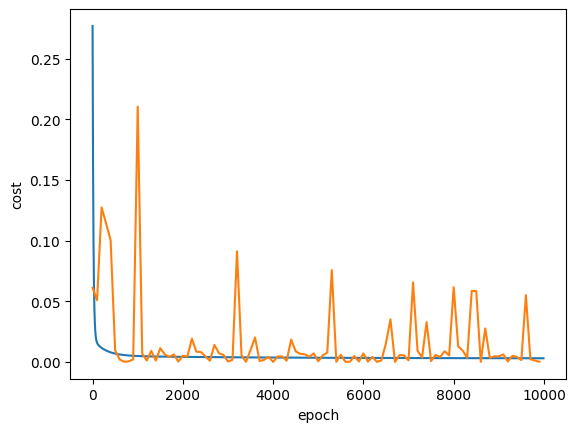

In [63]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_g,cost_list_g)